# Montu Python

## Case of study: Montu (Aldebaran) and Mars conjunction in times of Egypt

In [1]:
from montu import *
import matplotlib.pyplot as plt
%matplotlib inline

# Load SPICE data
Montu.load_kernels(verbose=True)

# Load stars
allstars=Stars()

%load_ext autoreload
%autoreload 2

Loading kernel latest_leapseconds.tls
Loading kernel de441_part-1.bsp
Loading kernel de441_part-2.bsp


## The stars

Get Aldebaran position and stars around it:

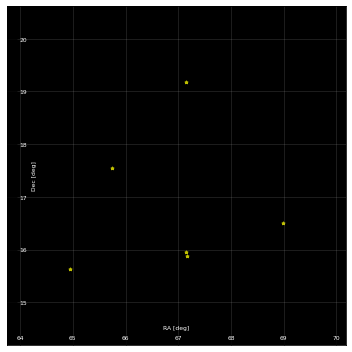

In [2]:
aldebaran = allstars.get_stars(ProperName='Aldebaran')
hyades = allstars.get_stars_area(RA=aldebaran.data.RA,Dec=aldebaran.data.Dec,radius=5,Mag=[-1,4])
fig,axs = hyades.plot_stars(pad=0.1)

## A known conjunction

On Spetember the 7th, 2022 Mars get very close to the Hyades and Aldebaran. This is how the conjunction was predicted (see original publication [here](https://whenthecurveslineup.com/2022/08/08/2022-september-7-mars-aldebaran-conjunction-evening-moon-saturn/):

<img src='https://i0.wp.com/whenthecurveslineup.com/wp-content/uploads/2022/08/mars_220907-t.png?w=601&ssl=1'/>

Create the planet and choose the time of the conjunction:

In [3]:
mars = Planet(id='4')
mtime = MonTime('2022-09-07 00:00:00')

Get the ephemeris for the planet at the time of conjunction:

In [4]:
mars.calc_ephemerides(mtime.et)
mars.RAJ2000,mars.DECJ2000,aldebaran.data.RA,aldebaran.data.Dec

(4.5262400464155474,
 20.665033231657006,
 15107    4.598667
 Name: RA, dtype: float64,
 15107    16.509762
 Name: Dec, dtype: float64)

As we can see Mars and Aldebaran are pretty close on that date. Let's see the configuration:

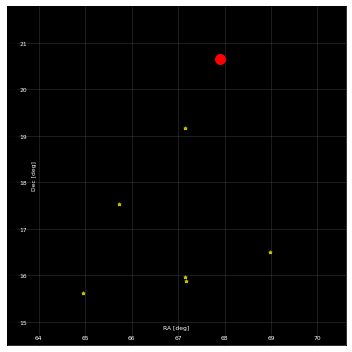

In [5]:
fig,ax = hyades.plot_stars(pad=0.1)
ax.plot(15*mars.RAJ2000, mars.DECJ2000,'ro',ms=10)

We can compute the angular distance:

In [6]:
angdist = mars.angle_to_star(aldebaran)
Montu.dec2hex(angdist)

(4.0, 16, 51.19847246213048)

Que coincide con lo predicho con `Stellarium`

<img src="https://github.com/seap-udea/MontuPython/blob/main/dev/gallery/conjunction-mars-aldebaran-2022-stellarium.png?raw=true"/>

What was the angle $\theta$ between Mars and the Sun at that day? This angle give us an indication of an opposition, $\cos\theta \approx -1$ or a conjunction $\cos\theta \approx +1$. To make this we need to create the sun as a planet: 

In [7]:
sun = Planet(id='10')
sun.calc_ephemerides(epochs=mtime.et)

And then compute the angular distance between them:

In [8]:
teta = mars.angle_to_planet(sun)
Montu.dec2hex(teta)

(94.0, 40, 40.702914656577605)

So, Mars is almost in quadrature with the Sun as confirmed by Stellarium.

Now we will compute the angular motion of Mars in the weeks after the conjunction:

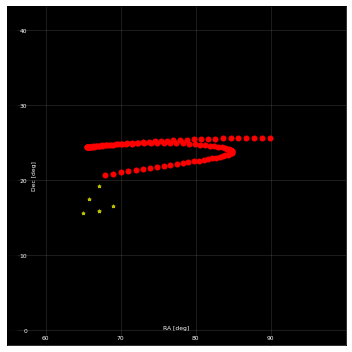

In [9]:
mtime = MonTime('2022-09-07 00:00:00')
deltat = 200*DAY
ets = np.linspace(mtime.et,mtime.et+deltat,100)
fig,ax = hyades.plot_stars(pad=0.1)

for et in ets:
    mars.calc_ephemerides(et)
    ax.plot(15*mars.RAJ2000, mars.DECJ2000,'ro',ms=5)

The stationary points are around two well-defined dates

In [112]:
mtime = MonTime('2022-10-29 00:00:00')
mars.calc_ephemerides(mtime.et)
angdist = mars.angle_to_star(aldebaran)

sun.calc_ephemerides(epochs=mtime.et)
teta = mars.angle_to_planet(sun)
ra_speed, dec_speed, ang_speed = mars.calc_proper_motion(mtime.et,dt=0.001*DAY)
print(Montu.dec2hex(angdist), Montu.dec2hex(teta),ang_speed*DAY)

mtime = MonTime('2023-01-11 00:00:00')
mars.calc_ephemerides(mtime.et)
angdist = mars.angle_to_star(aldebaran)
ra_speed, dec_speed, ang_speed = mars.calc_proper_motion(mtime.et,dt=0.001*DAY)

sun.calc_ephemerides(epochs=mtime.et)
teta = mars.angle_to_planet(sun)
print(Montu.dec2hex(angdist), Montu.dec2hex(teta),ang_speed*DAY)

(16.0, 32, 4.378411814606693) (129.0, 56, 43.29549085143981) 0.049748952424355695
(8.0, 31, 55.134176910966346) (137.0, 36, 9.747943105744525) 0.024293390944437148


Look that Mars, in both cases is almost at opposition with respect to the Sun. 

Let's see now a plot of angular distance and teta close to the conjunction:

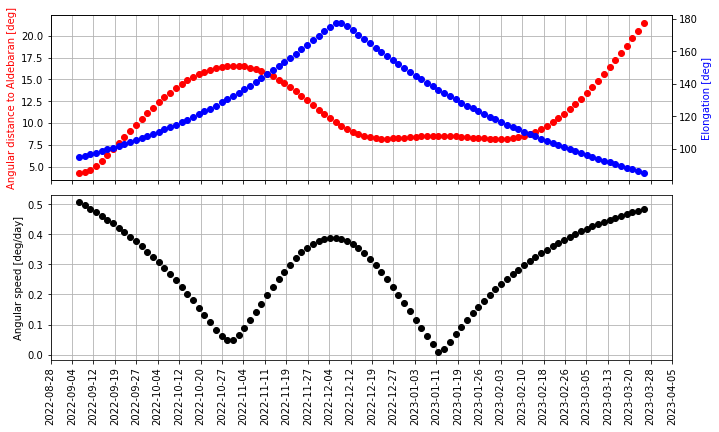

In [105]:
mtime = MonTime('2022-09-07 00:00:00')
deltat = 200*DAY
ets = np.linspace(mtime.et,mtime.et+deltat,100)

fig,axs = plt.subplots(2,1,figsize=(10,6),sharex=True)

ax = axs[0]
ax2 = ax.twinx()

for et in ets:
    # Update position 
    mars.calc_ephemerides(et)
    sun.calc_ephemerides(et)

    # Angular distances    
    angdist = mars.angle_to_star(aldebaran)
    teta = mars.angle_to_planet(sun)
    
    # Angular velocity
    ra_speed, dec_speed, ang_speed = mars.calc_proper_motion(et,dt=0.01*DAY)

    # Plot
    ax.plot(et,angdist,'ro')
    ax2.plot(et,teta,'bo')
    axs[1].plot(et,ang_speed*DAY,'ko')

for ax in axs:
    ax.grid()
    # ax.margins(0)

Montu.time_ticks(axs[1],nticks=30,rotation=90)
axs[0].set_ylabel("Angular distance to Aldebaran [deg]",color='r')
ax2.set_ylabel("Elongation [deg]",color='b')
axs[1].set_ylabel("Angular speed [deg/day]",color='k')

fig.tight_layout()